#**Text Classification**

In [ ]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import pylab as pl

In [ ]:
#Read the data
df=pd.read_csv('/content/dataset (3).csv')
df.fillna(' ')
#Get shape and head
df.shape
df.head()

,No.,Title,Text,Label
0,1,The Brazilian doctor offering bogus Covid reme...,A Brazilian state representative and doctor is...,Fake
1,2,France puzzled by mystery anti-Pfizer campaign...,Several French social media influencers say th...,Fake
2,3,Covid-19: YouTube launches vaccination ad camp...,YouTube has launched a multi-million-pound adv...,Fake
3,4,Israel-Palestinian conflict: False and mislead...,As the Israel-Palestinian conflict has escalat...,Fake
4,5,The misinformation bubble threatening Brazil's...,False information from the mouths of politicia...,Fake


In [ ]:
#DataFlair - Get the labels
labels=df.Label
labels.head()

0    Fake
1    Fake
2    Fake
3    Fake
4    Fake
Name: Label, dtype: object

In [ ]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=train_test_split(df['Text'], labels, test_size=0.2, random_state=1)

In [ ]:
#DataFlair - Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [ ]:
#Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=100)
pac.fit(tfidf_train,y_train)

#Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 80.0%


In [ ]:
# Build confusion matrix
confusion_matrix(y_test,y_pred, labels=['Fake','Real'])

array([[ 3,  5],
       [ 3, 29]])

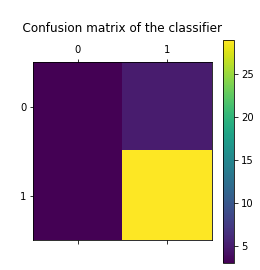

In [ ]:
cm = confusion_matrix(y_test, y_pred)
pl.matshow(cm)
pl.title('\n    Confusion matrix of the classifier    \n')
pl.colorbar()
pl.show()